In [13]:
# Let us import some awesome libraries!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Let us load the datasets.

# This one contains global informations on the commits and their commiters.
exploration = pd.read_csv('results/exploration.csv')

# This one is the result of a study of the 'git diff' commands for each of them, in order to put them in a category.
classification = pd.read_csv('results/classification.csv')

# Commits exploration

The *exploration* dataset contains very basic informations on the commits: 

* **COMMIT_HASH** is the unique identifier of the commit on the repository.
* **AUTHOR_NAME** and **AUTHOR_EMAIL** are the identity of the author of the commit.
* **MODIFICATIONS_COUNT** is the number of modified files in the commit.
* **TIMESTAMP** is the timestamp at which the commit has been made.

Let us take a look on some of the lines. 
As we have build the datasets ourself, we already know that there is no missing value.

In [3]:
print('The dataset contains informations about', len(exploration), 'commits.')

exploration.sample(10)

The dataset contains informations about 24036 commits.


,COMMIT_HASH,AUTHOR_NAME,AUTHOR_EMAIL,MODIFICATIONS_COUNT,TIMESTAMP
19553,e7bf670065eeae4f1ee0c0a8999173b8aa1786b4,Anthony Erlinger,aerlinger@gmail.com,1,1430239327000
10873,b321d4c89329d4314daba49f5a4fc04bf478745a,Peter Prettenhofer,peter.prettenhofer@gmail.com,1,1350546039000
1124,f6e9a2a1d86a008a187d6d3efdee2df3b3afa974,Yaroslav Halchenko,debian@onerussian.com,1,1279556548000
20022,9207639e5727ed25a0851449940dee50ba51c532,Andreas Mueller,amueller@nyu.edu,1,1438295849000
10652,10b8b13fd58bfa8eca758047009d7d17c80af0af,Jaques Grobler,jaquesgrobler@gmail.com,1,1348662033000
23658,d8ec63075f61a12b6b639a390cb3023e2190d956,Joel Nothman,joel.nothman@gmail.com,1,1505697099000
6543,77ec530a699d5925ff4019fd0b552a37dc658c0f,Robert Layton,robertlayton@gmail.com,1,1319188016000
1398,35146dc81b70b1989e4fe56812e1dad0e67e3f01,Alexandre Gramfort,alexandre.gramfort@inria.fr,1,1282212768000
3664,208915f8b7eed4128b404da892eba8e5a59b1f6c,Olivier Grisel,olivier.grisel@ensta.org,1,1302478334000
5275,d814dbf0d247542dbf3cd9fb8102536c7dcec3da,Clay Woolam,clay@woolam.org,3,1312783893000


## What can we infer...

### ... about the authors?

#### How many unique contributors have worked on this repository?

In [40]:
authors = exploration['AUTHOR_NAME'].value_counts()

print('There is', len(authors), 'unique contributors on the repository.')

There is 1225 unique contributors on the repository.


#### Who are the persons who committed the most?

In [41]:
top_committers.head(10)

Olivier Grisel        2287
Andreas Mueller       2091
Fabian Pedregosa      1674
Lars Buitinck         1283
Alexandre Gramfort    1078
Gilles Louppe          942
Gael Varoquaux         884
Peter Prettenhofer     868
Mathieu Blondel        784
Gael varoquaux         654
Name: AUTHOR_NAME, dtype: int64

#### Do contributors commit once?

In [43]:
top_committers.describe()

count    1225.000000
mean       19.621224
std       128.629878
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      2287.000000
Name: AUTHOR_NAME, dtype: float64

### ... about the number of modifications per commit?

#### Is there a lot of files modified in a commit?

In [6]:
exploration['MODIFICATIONS_COUNT'].describe()

count    24036.000000
mean         4.843859
std         27.531903
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        911.000000
Name: MODIFICATIONS_COUNT, dtype: float64

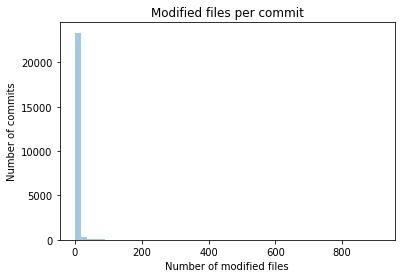

In [22]:
sns.distplot(exploration['MODIFICATIONS_COUNT'], kde = False)
plt.title('Modified files per commit')
plt.xlabel('Number of modified files')
plt.ylabel('Number of commits');

### Was there bigger commits at the project start?

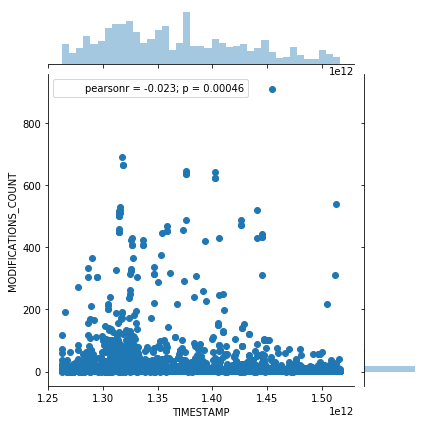

In [28]:
sns.jointplot(x = 'TIMESTAMP', y = 'MODIFICATIONS_COUNT', data = exploration);